In [38]:
NAME = "Andalib Rahman Shagoto"
ID = "20101195"

This assignment contains 3 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [39]:
# Import libraries 

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....
from skimage.io import imread
from skimage import img_as_float 
from skimage.color import rgb2gray
# from skimage.util import pad
from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [40]:
# Define helper functions

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....
def plot_image(img,figsize=(5,5)):
  plt.figure(figsize=figsize)
  if len(img.shape)==2:
      plt.imshow(img, cmap="gray")
  else:
      plt.imshow(img)
  plt.axis("off")
  plt.show()
  print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1-size//2)**2+(y1-size//2)**2)/(2*(sigma**2)))
  z = z/(2*np.pi*(sigma**2))

  return z

## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


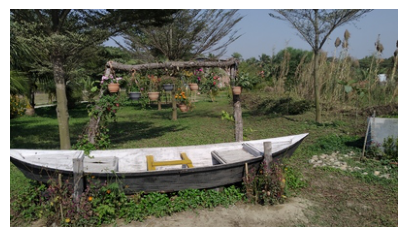

Image shape:  (225, 400, 3)


In [41]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = img_as_float(imread('/content/sample.jpg')) # TO-BE-COMPLETED
plot_image(image)

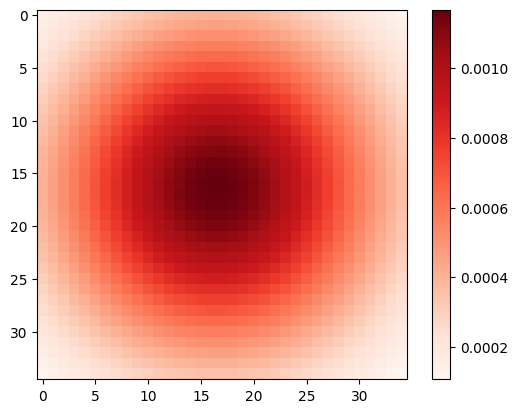

Kernel shape:  (35, 35)


In [42]:
# Define a gaussian kernel of size (35, 35)

kernel = gaussian2D(35, 35/3) # TO-BE-COMPLETED
plot_kernel(kernel)

In [43]:
# Determine the time to filter the image with the kernel using "direct" method

import time
 
start_time = time.process_time()
 
filetred_image_direct = np.zeros(image.shape) # TO-BE-COMPLETED
for i in range(3):
  filetred_image_direct[:, :, i] = signal.correlate(image[:, :, i], kernel, mode='same', method='direct')
 
print("Time elapsed using direct method of correlation: ", time.process_time() - start_time, "seconds")

Time elapsed using direct method of correlation:  4.649141311000001 seconds


In [44]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.process_time()
 
filetred_image_fft = np.zeros(image.shape)  # TO-BE-COMPLETED
for i in range(3):
  filetred_image_fft[:, :, i] = signal.correlate(image[:, :, i], kernel, mode='same', method='fft')
 
print("Time elapsed using fft method of correlation: ", time.process_time() - start_time, "seconds")

Time elapsed using fft method of correlation:  0.023793451999999604 seconds


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

FFT is the faster method as it took almost 300 times lesser to execute.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


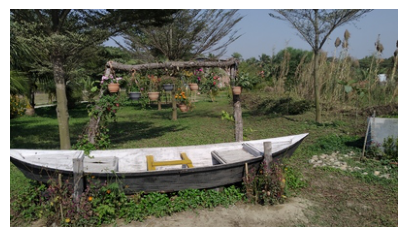

Image shape:  (225, 400, 3)


In [45]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = img_as_float(imread('/content/sample.jpg')) # TO-BE-COMPLETED
plot_image(image)

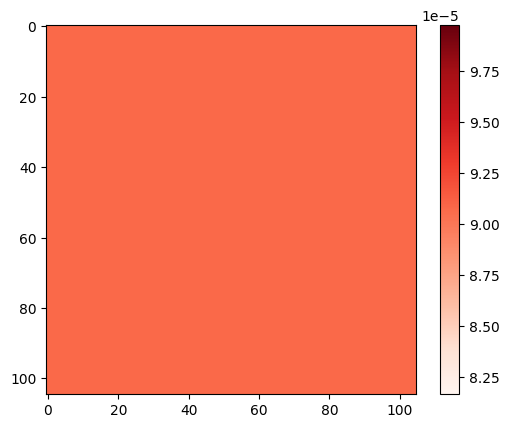

Kernel shape:  (105, 105)


In [46]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = box_kernel(105) # TO-BE-COMPLETED
plot_kernel(kernel_symmetric)

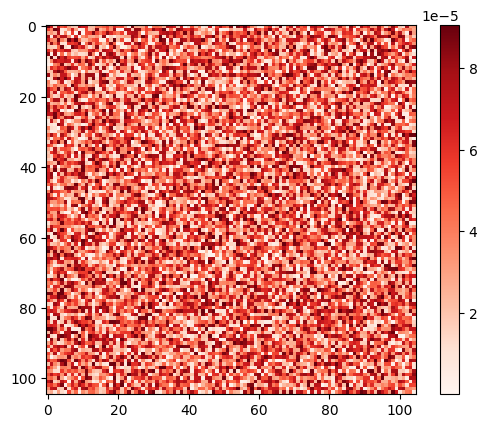

Kernel shape:  (105, 105)


In [47]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = box_kernel(105) # TO-BE-COMPLETED
for i in range(105):
  for j in range(105):
    kernel_asymmetric[i][j] = np.random.uniform(0.0, 1.0/105**2)
plot_kernel(kernel_asymmetric)

In [49]:
# Filter the image with the symmetric kernel using the correlation function
    
filtered_image_symmetric = np.zeros_like(image) # TO-BE-COMPLETED
for i in range(3):
  filtered_image_symmetric[:,:,i] = signal.correlate(image[:,:,i], kernel_symmetric, mode='same', method='auto')

filtered_image_asymmetric = np.zeros_like(image) # TO-BE-COMPLETED
for i in range(3):
  filtered_image_asymmetric[:,:,i] = signal.correlate(image[:,:,i], kernel_asymmetric, mode='same', method='auto')

(-0.5, 399.5, 224.5, -0.5)

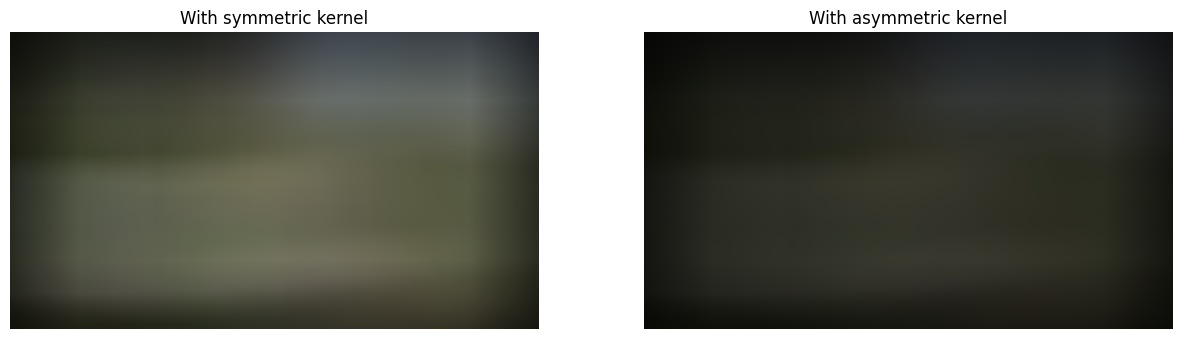

In [50]:
# Display the images side by side (with proper labeling, which is which)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
ax[0].imshow(filtered_image_symmetric)
ax[0].set_title("With symmetric kernel")
ax[0].axis('off')

ax[1].imshow(filtered_image_asymmetric)
ax[1].set_title("With asymmetric kernel")
ax[1].axis('off')

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

More information is lost when asymmetric kernel is used.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [51]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = np.zeros_like(image) # TO-BE-COMPLETED
for i in range(3):
  filtered_image_symmetric[:,:,i] = signal.convolve(image[:,:,i], kernel_symmetric, mode='same', method='auto')

filtered_image_asymmetric = np.zeros_like(image) # TO-BE-COMPLETED
for i in range(3):
  filtered_image_asymmetric[:,:,i] = signal.convolve(image[:,:,i], kernel_asymmetric, mode='same', method='auto')

(-0.5, 399.5, 224.5, -0.5)

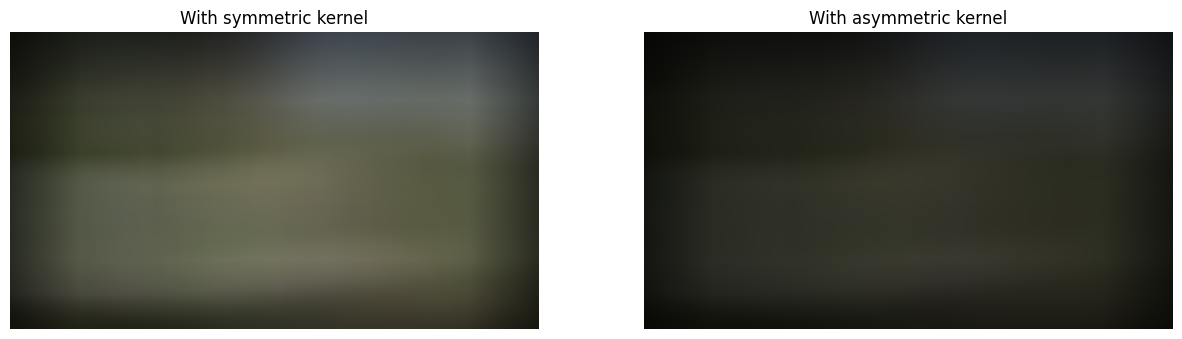

In [52]:
# Display the images side by side (with proper labeling, which is which)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
ax[0].imshow(filtered_image_symmetric)
ax[0].set_title("With symmetric kernel")
ax[0].axis('off')

ax[1].imshow(filtered_image_asymmetric)
ax[1].set_title("With asymmetric kernel")
ax[1].axis('off')

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

Here the images when using symmetric kernel are same for both correlate and convolve method but slightly different when using asymmetric kernel. This is because in convolve method the kernels are rotated or flipped, for which symmetric kernels remain unchanged and asymmetric kernels change. 

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

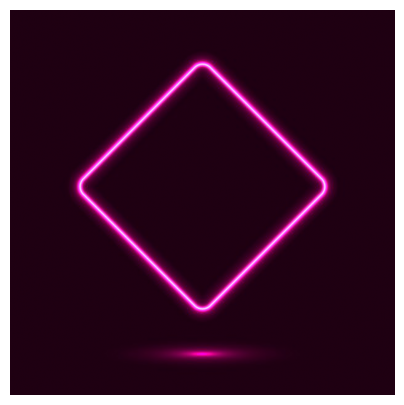

Image shape:  (626, 626, 3)


In [53]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = img_as_float(imread('/content/diamond2.jpg')) # TO-BE-COMPLETED
plot_image(image)

In [58]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[0, -1, -1], # TO-BE-COMPLETED
                     [1, 0, -1], # TO-BE-COMPLETED
                     [1, 1, 0]]) # TO-BE-COMPLETED

kernel_2 = np.array([[1, 1, 0], # TO-BE-COMPLETED
                     [1, 0, -1], # TO-BE-COMPLETED
                     [0, -1, -1]]) # TO-BE-COMPLETED

(-0.5, 625.5, 625.5, -0.5)

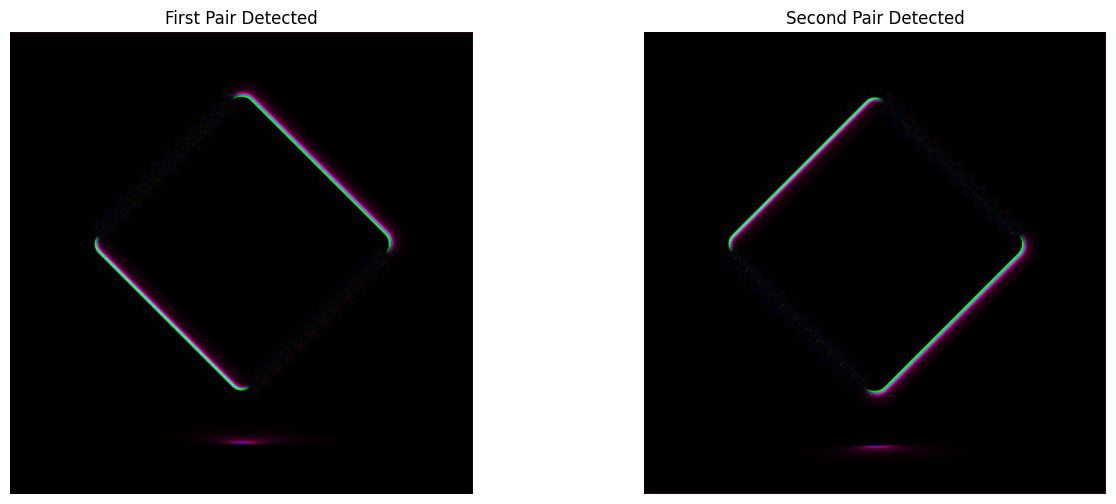

In [59]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = np.zeros_like(image) # TO-BE-COMPLETED

# detect the second pair using image filtering with kernel_2

second_pair_detected = np.zeros_like(image) # TO-BE-COMPLETED

# plot the two filtered images side by side
for i in range(3):
  first_pair_detected[:,:,i] = signal.correlate(image[:,:,i], kernel_1, mode='same', method='auto')

for i in range(3):
  second_pair_detected[:,:,i] = signal.correlate(image[:,:,i], kernel_2, mode='same', method='auto')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
ax[0].imshow(first_pair_detected)
ax[0].set_title("First Pair Detected")
ax[0].axis('off')

ax[1].imshow(second_pair_detected)
ax[1].set_title("Second Pair Detected")
ax[1].axis('off')
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


Since the edges need to be detected in parallel, kernels with diagonal values having zero can be used. Having zero in kernel will give the same result after matrix multiplication and addition with the pixel value. Other kernels with different values can also be used but must have a zero diagonal from either side.

## **The END**